# Linear Regression project - Football matches

Using the Matches csv file from [Club-Football-Match-Data-2000-2025](https://github.com/xgabora/Club-Football-Match-Data-2000-2025) to build a linear regression model which predicts the score of a match given some factors.

In [28]:
import pandas as pd

In [29]:
dtypes = {'MatchTime':"str"}
parse_dates = ['MatchDate']
df = pd.read_csv('Matches.csv', dtype=dtypes, parse_dates=parse_dates)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230557 entries, 0 to 230556
Data columns (total 48 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Division     230557 non-null  object        
 1   MatchDate    230557 non-null  datetime64[ns]
 2   MatchTime    99072 non-null   object        
 3   HomeTeam     230557 non-null  object        
 4   AwayTeam     230557 non-null  object        
 5   HomeElo      141597 non-null  float64       
 6   AwayElo      141528 non-null  float64       
 7   Form3Home    229057 non-null  float64       
 8   Form5Home    229057 non-null  float64       
 9   Form3Away    229057 non-null  float64       
 10  Form5Away    229057 non-null  float64       
 11  FTHome       230554 non-null  float64       
 12  FTAway       230554 non-null  float64       
 13  FTResult     230554 non-null  object        
 14  HTHome       175977 non-null  float64       
 15  HTAway       175977 non-null  floa

In [31]:
df['Division'].unique()

array(['F1', 'F2', 'T1', 'D1', 'D2', 'B1', 'E2', 'E1', 'N1', 'P1', 'E0',
       'I2', 'SP2', 'SP1', 'I1', 'E3', 'SC0', 'SC1', 'SC2', 'SC3', 'G1',
       'EC', 'USA', 'SWE', 'NOR', 'IRL', 'BRA', 'ARG', 'MEX', 'JAP',
       'RUS', 'POL', 'DEN', 'ROM', 'AUT', 'SUI', 'FIN', 'CHN'],
      dtype=object)

Columns 29 and on are describing bettings odds, so we don't need to worry about those. We also don't need Division, match date/time, team names or elo. Finally, since older matches don't have some data, let's look at the last 5 years only, and from the top 5 leagues. 

In [32]:
df = df[df['MatchDate'] >= '2020-01-01']
df = df[df['Division'].isin(['E0', 'F1', 'SP1','D1', 'I1'])] # top 5 European leagues
df[0:28].head()

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
168413,E0,2020-01-01,12:30:00,Brighton,Chelsea,1659.32,1855.04,3.0,5.0,6.0,...,2.23,0.5,1.88,2.02,0.0145,0.4539,0.1097,0.0220,0.3704,0.0296
168414,E0,2020-01-01,12:30:00,Burnley,Aston Villa,1683.98,1615.34,3.0,6.0,3.0,...,2.03,-0.8,2.06,1.84,0.0413,0.0693,0.0099,0.8274,0.0389,0.0132
168416,E0,2020-01-01,15:00:00,Newcastle,Leicester,1708.02,1830.20,3.0,6.0,3.0,...,1.99,0.8,2.03,1.87,0.0336,0.1672,0.0099,0.6525,0.0552,0.0815
168417,E0,2020-01-01,15:00:00,Southampton,Tottenham,1674.35,1840.87,7.0,7.0,4.0,...,2.33,0.3,2.00,1.90,0.1501,0.0342,0.0100,0.6776,0.1141,0.0140
168418,E0,2020-01-01,15:00:00,Watford,Wolves,1662.98,1774.71,7.0,8.0,6.0,...,1.91,0.3,1.89,2.01,0.0598,0.0173,0.8781,0.0099,0.0250,0.0099


In [33]:
df = df[[
 'Form3Home',
 'Form5Home',
 'Form3Away',
 'Form5Away',
 'FTHome',
 'FTAway',
 'FTResult',
 'HTHome',
 'HTAway',
 'HTResult',
 'HomeShots',
 'AwayShots',
 'HomeTarget',
 'AwayTarget',
 'HomeFouls',
 'AwayFouls',
 'HomeCorners',
 'AwayCorners',
 'HomeYellow',
 'AwayYellow',
 'HomeRed',
 'AwayRed'           
]]
df.head()

,Form3Home,Form5Home,Form3Away,Form5Away,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed
168413,3.0,5.0,6.0,6.0,1.0,1.0,D,0.0,1.0,A,...,5.0,5.0,8.0,15.0,5.0,3.0,2.0,3.0,0.0,0.0
168414,3.0,6.0,3.0,3.0,1.0,2.0,A,0.0,2.0,A,...,1.0,6.0,12.0,10.0,8.0,4.0,1.0,1.0,0.0,0.0
168416,3.0,6.0,3.0,7.0,0.0,3.0,A,0.0,2.0,A,...,2.0,10.0,8.0,12.0,4.0,5.0,1.0,1.0,0.0,0.0
168417,7.0,7.0,4.0,10.0,1.0,0.0,H,1.0,0.0,H,...,3.0,5.0,21.0,8.0,6.0,9.0,3.0,4.0,0.0,0.0
168418,7.0,8.0,6.0,7.0,2.0,1.0,H,1.0,0.0,H,...,3.0,4.0,12.0,6.0,4.0,7.0,3.0,1.0,1.0,0.0


In [34]:
df.isnull().sum()

Form3Home      0
Form5Home      0
Form3Away      0
Form5Away      0
FTHome         0
FTAway         0
FTResult       0
HTHome         0
HTAway         0
HTResult       0
HomeShots      0
AwayShots      0
HomeTarget     0
AwayTarget     0
HomeFouls      0
AwayFouls      0
HomeCorners    0
AwayCorners    0
HomeYellow     0
AwayYellow     0
HomeRed        0
AwayRed        0
dtype: int64

In [35]:
df.head()

,Form3Home,Form5Home,Form3Away,Form5Away,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed
168413,3.0,5.0,6.0,6.0,1.0,1.0,D,0.0,1.0,A,...,5.0,5.0,8.0,15.0,5.0,3.0,2.0,3.0,0.0,0.0
168414,3.0,6.0,3.0,3.0,1.0,2.0,A,0.0,2.0,A,...,1.0,6.0,12.0,10.0,8.0,4.0,1.0,1.0,0.0,0.0
168416,3.0,6.0,3.0,7.0,0.0,3.0,A,0.0,2.0,A,...,2.0,10.0,8.0,12.0,4.0,5.0,1.0,1.0,0.0,0.0
168417,7.0,7.0,4.0,10.0,1.0,0.0,H,1.0,0.0,H,...,3.0,5.0,21.0,8.0,6.0,9.0,3.0,4.0,0.0,0.0
168418,7.0,8.0,6.0,7.0,2.0,1.0,H,1.0,0.0,H,...,3.0,4.0,12.0,6.0,4.0,7.0,3.0,1.0,1.0,0.0


Now the data is free from NULL values and extra columns, we need to covert the 'Result' columns into numeric values. We will consider a Home victory to be 1, and Away to be 0. A draw will be 0.5. We should also remove the scores (FTHome, FTAway, HTHome, HTAway) since we have the 'Result' columns, and the FTHome and FTAway columns obviously tell us the result. 

In [36]:
df.select_dtypes(include='object')

,FTResult,HTResult
168413,D,A
168414,A,A
168416,A,A
168417,H,H
168418,H,H
...,...,...
230531,A,A
230532,A,A
230533,A,H
230534,A,A


In [37]:
def convert(x):
    if x == 'H':
        return 1
    if x == 'D':
        return 0.5
    else: return 0

In [38]:
df['FTResult'] = df['FTResult'].apply(convert)
df['HTResult'] = df['HTResult'].apply(convert)
df[['FTResult','HTResult']]

,FTResult,HTResult
168413,0.5,0.0
168414,0.0,0.0
168416,0.0,0.0
168417,1.0,1.0
168418,1.0,1.0
...,...,...
230531,0.0,0.0
230532,0.0,0.0
230533,0.0,1.0
230534,0.0,0.0


In [43]:
df = df.drop(['FTHome', 'FTAway', 'HTHome', 'HTAway'], axis=1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9818 entries, 168413 to 230535
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Form3Home    9818 non-null   float64
 1   Form5Home    9818 non-null   float64
 2   Form3Away    9818 non-null   float64
 3   Form5Away    9818 non-null   float64
 4   FTResult     9818 non-null   float64
 5   HTResult     9818 non-null   float64
 6   HomeShots    9818 non-null   float64
 7   AwayShots    9818 non-null   float64
 8   HomeTarget   9818 non-null   float64
 9   AwayTarget   9818 non-null   float64
 10  HomeFouls    9818 non-null   float64
 11  AwayFouls    9818 non-null   float64
 12  HomeCorners  9818 non-null   float64
 13  AwayCorners  9818 non-null   float64
 14  HomeYellow   9818 non-null   float64
 15  AwayYellow   9818 non-null   float64
 16  HomeRed      9818 non-null   float64
 17  AwayRed      9818 non-null   float64
dtypes: float64(18)
memory usage: 1.4 MB


Now we can start creating and training our linear regression model. We want to predict the FTResult given the rest of the attributes. 

In [61]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [45]:
X = df.drop('FTResult',axis=1)
y = df['FTResult']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [50]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [51]:
base_elastic_model = ElasticNet()

In [53]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [55]:
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [56]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [57]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

In [58]:
y_pred = grid_model.predict(scaled_X_test)

In [59]:
mean_absolute_error(y_test,y_pred)

0.2542191710729402

In [62]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(0.3135969470766086)

In [63]:
np.mean(df['FTResult'])

np.float64(0.5538806274190263)

<Axes: xlabel='FTResult', ylabel='FTResult'>

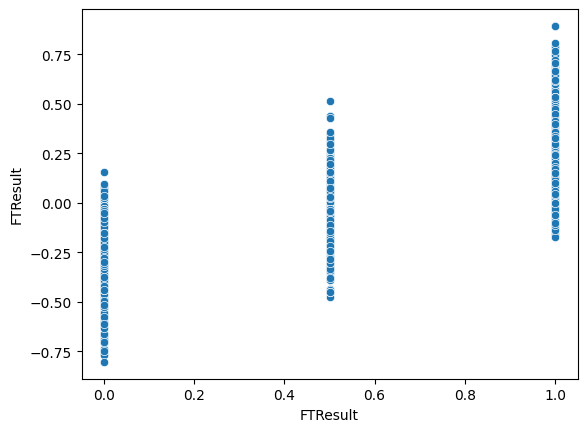

In [67]:

import seaborn as sns

residuals = y_test - y_pred

sns.scatterplot(x=y_test, y=residuals)